# 🛒 Walmart Sales Data Analysis Project
**Objective:** Analyze sales data to identify trends, seasonality, and product performance  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn  
**Techniques:** EDA, Time Series Analysis, Correlation Matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df.shape

(6435, 8)

In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
#Getting descriptive statistics summary
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
#Checking missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
# Check for duplicates
df.duplicated().sum()

0

In [21]:
#Converting Date column into Standard Format 
print(df['Date'].dtype)

object


In [23]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [25]:
print(df['Date'].dtype)

datetime64[ns]


In [27]:
#extract time features for analysis:
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Week']=df['Date'].dt.isocalendar().week

In [29]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,42


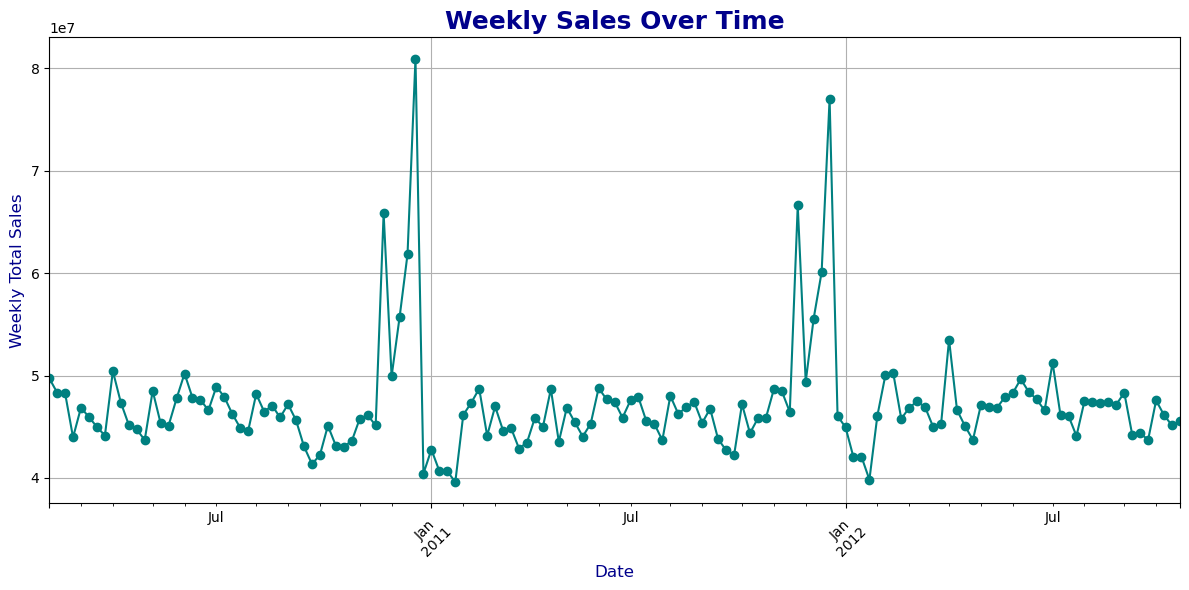

In [38]:
#Exploratory Data Analysis (EDA)
#1.Weekly Sales Trend Over Time-
df.groupby('Date')["Weekly_Sales"].sum().plot(figsize=(12,6),color='teal',
    linestyle='-',
    marker='o')
plt.title("Weekly Sales Over Time",fontsize=18,fontweight='bold',color='darkblue')
plt.xlabel("Date",fontsize=12,color='darkblue')
plt.ylabel("Weekly Total Sales",fontsize=12,color='darkblue')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

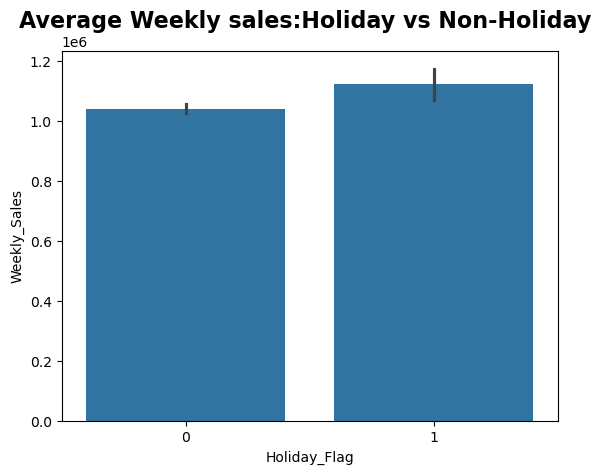

In [32]:
#2.Average Weekly sales:Holiday vs Non-Holiday Sales Comparison
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df,x="Holiday_Flag",y="Weekly_Sales",estimator='mean')
plt.title("Average Weekly sales:Holiday vs Non-Holiday ",fontsize=16,fontweight='bold')
plt.show()




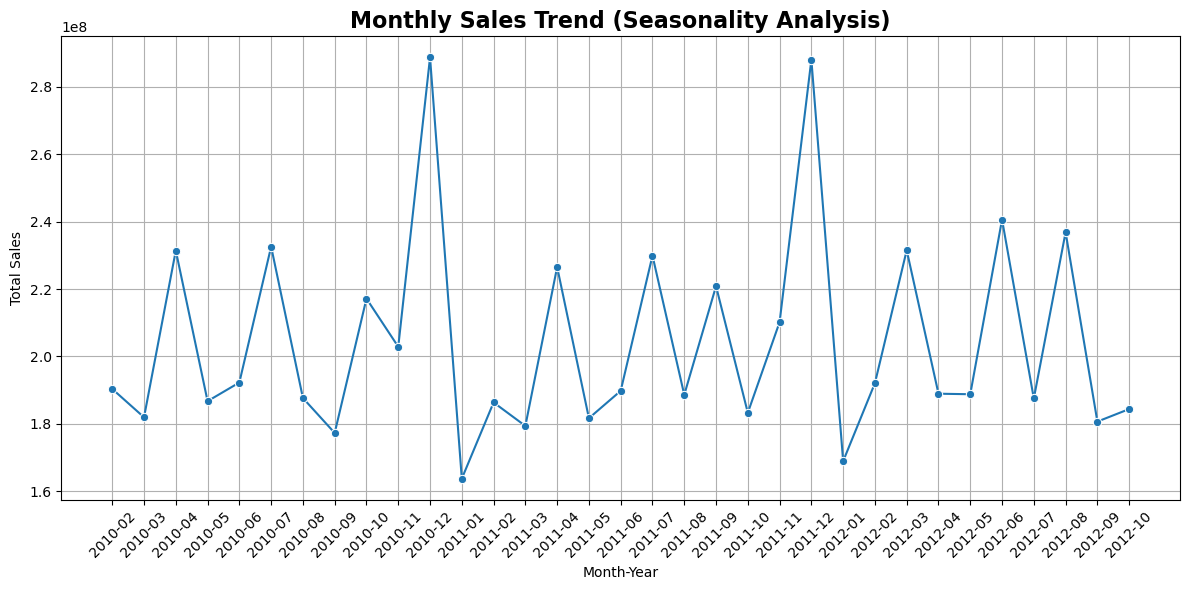

In [34]:
#3. Monthly Sales Trend (Seasonality Analysis)
df['Month_Year']=df['Date'].dt.to_period('M').astype(str)
monthly_sales=df.groupby('Month_Year')['Weekly_Sales'].sum().reset_index()
#plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales,x='Month_Year',y='Weekly_Sales',marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend (Seasonality Analysis)", fontsize=16, fontweight='bold')
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

Top 5 Stores by Sales:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


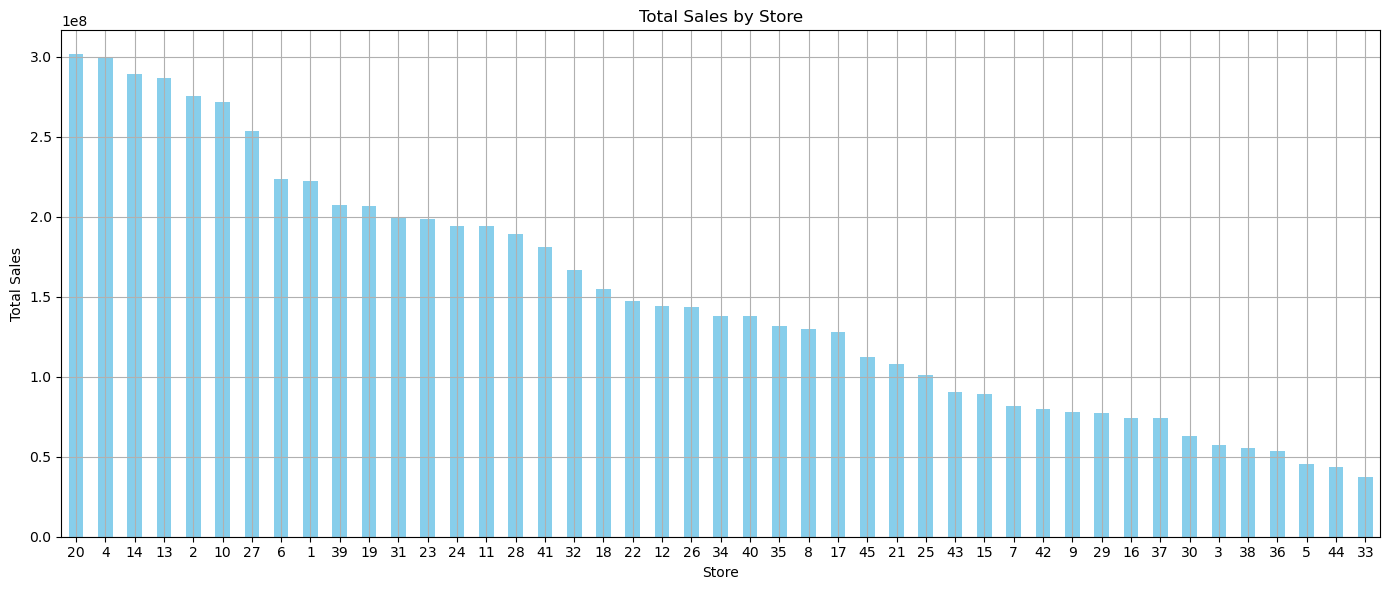

In [40]:
#4.Store-wise Performance Analysis
store_sales=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
# Top 5 stores
print("Top 5 Stores by Sales:")
print(store_sales.head())
store_sales.plot(kind='bar', figsize=(14,6), color='skyblue')
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


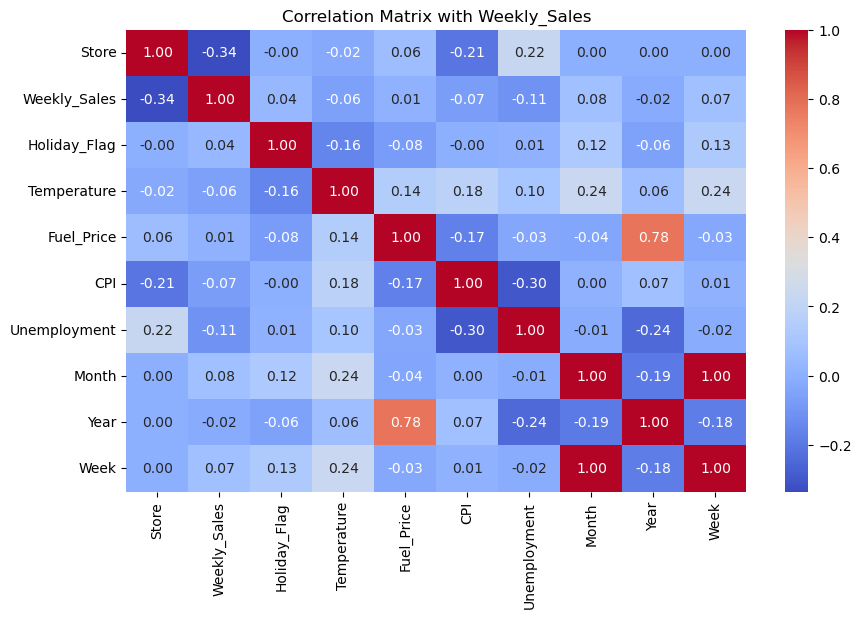

In [46]:
#5.Correlation with Weekly_Sales
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix with Weekly_Sales")
plt.show()

**Conclusion & Recommendations**
Summary of Key Findings
 **1. Weekly Sales Trend**  
Sales fluctuate weekly, with occasional sharp peaks and dips.  
Seasonal patterns are evident during certain months (e.g., holidays).

**2. Holiday Impact**  
Sales during holidays show a slight increase compared to non-holidays.  
However, the effect is not significantly strong based on correlation analysis.

**3. Store-wise Performance**  
Certain stores consistently outperform others.  
Variation suggests regional or size-based differences.

**4. Monthly & Seasonal Trend**  
Month and week show minor correlations with sales (light seasonality).  
Peak months align with festivals and year-end seasons.

**5. Feature Influence on Sales**  
`Store`, `Holiday_Flag`, and `Month` are relatively more relevant.  
Economic indicators like `Fuel_Price`, `CPI`, and `Unemployment` show weak impact.

 **Recommendations**:
**1. Improve Forecasting with Seasonal Awareness**
Incorporate monthly trends and holiday indicators in forecasting models.
**2. Optimize Inventory by Store**  
Prioritize top-performing stores for inventory allocation.
**3. Holiday Stock Planning**
Slight increase in holiday sales suggests early holiday promotions or bundled offers can boost sales further.
**4. Focus on Data-Driven Decisions**
   Periodically update the model as external factors (like economy or fuel prices) may shift over time.
   